In [4]:
import matplotlib.pyplot as plt
from torchvision import transforms
from PIL import Image

def resize_with_padding(img, target_size):
    """
    이미지에 여백을 추가하여 원하는 크기로 조정합니다.
    img: PIL 이미지 객체
    target_size: (너비, 높이) 형태의 튜플
    """
    # 원본 이미지의 크기를 계산
    original_width, original_height = img.size
    target_width, target_height = target_size

    # 원본과 타겟의 비율 계산
    ratio_img = original_width / original_height
    ratio_target = target_width / target_height

    if ratio_img > ratio_target:
        # 이미지가 타겟보다 넓은 경우, 너비 기준으로 맞추고 높이에 여백 추가
        resize_width = target_width
        resize_height = round(resize_width / ratio_img)
    else:
        # 이미지가 타겟보다 높은 경우, 높이 기준으로 맞추고 너비에 여백 추가
        resize_height = target_height
        resize_width = round(resize_height * ratio_img)
    
    # 이미지 크기 조정
    img_resized = img.resize((resize_width, resize_height), Image.ANTIALIAS)

    # 여백을 추가하여 최종 이미지 크기를 target_size로 조정
    background = Image.new("RGB", target_size, (255, 255, 255))
    offset = ((target_width - resize_width) // 2, (target_height - resize_height) // 2)
    background.paste(img_resized, offset)

    return background

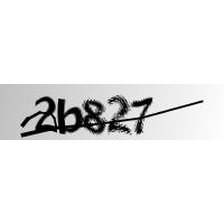

In [10]:
from PIL import Image, ImageOps

def resize_with_padding(img, target_size):
    """
    이미지에 여백을 추가하여 원하는 크기로 조정합니다.
    img: PIL 이미지 객체
    target_size: (너비, 높이) 형태의 튜플
    """
    # 원본 이미지의 크기를 계산
    original_width, original_height = img.size
    target_width, target_height = target_size

    # 원본과 타겟의 비율 계산
    ratio_img = original_width / original_height
    ratio_target = target_width / target_height

    if ratio_img > ratio_target:
        # 이미지가 타겟보다 넓은 경우, 너비 기준으로 맞추고 높이에 여백 추가
        resize_width = target_width
        resize_height = round(resize_width / ratio_img)
    else:
        # 이미지가 타겟보다 높은 경우, 높이 기준으로 맞추고 너비에 여백 추가
        resize_height = target_height
        resize_width = round(resize_height * ratio_img)
    
    # 이미지 크기 조정 (Image.ANTIALIAS 대신 Image.Resampling.LANCZOS 사용)
    img_resized = img.resize((resize_width, resize_height), Image.Resampling.LANCZOS)

    # 여백을 추가하여 최종 이미지 크기를 target_size로 조정
    background = Image.new("RGB", target_size, (255, 255, 255))
    offset = ((target_width - resize_width) // 2, (target_height - resize_height) // 2)
    background.paste(img_resized, offset)

    return background

# 사용 예
image_path = 'samples/2b827.png'  # 예시 이미지 경로 변경 필요
original_image = Image.open(image_path)

# 이미지에 여백을 추가하여 크기 조정
transformed_image = resize_with_padding(original_image, (224, 224))

# 결과 시각화
transformed_image.show()
